In [1]:
#install library
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras import initializers
from matplotlib import pyplot
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline
import keras.backend as K

Using TensorFlow backend.


In [2]:
#loading the data and check if there is missing value
data_btc = pd.read_csv('btc python.csv')
data_btc = data_btc.fillna(method='ffill')
data_btc.isnull().values.any()
#no missing value
data_btc.head()

,Date,btc_price,Open,High,Low,btc_change
0,1/2/2013,13.28,13.28,13.28,13.28,-0.0015
1,1/3/2013,13.40,13.4,13.4,13.4,0.0090
2,1/4/2013,13.50,13.5,13.5,13.5,0.0075
3,1/5/2013,13.44,13.44,13.44,13.44,-0.0044
4,1/6/2013,13.45,13.45,13.45,13.45,0.0007


In [3]:
data_vix = pd.read_csv("vix python.csv")
data_vix = data_vix.fillna(method='ffill')
data_vix.isnull().values.any()
data_vix.head()
#no missing value

,Date,vix_price,Open,High,Low,vix_change
0,1/2/2013,14.68,15.24,15.93,14.60,-0.1853
1,1/3/2013,14.56,14.77,14.92,14.24,-0.0082
2,1/4/2013,13.83,14.23,14.31,13.64,-0.0501
3,1/5/2013,13.83,14.23,14.31,13.64,-0.0501
4,1/6/2013,13.83,14.23,14.31,13.64,-0.0501


In [4]:
data_em = pd.read_csv("MSCI EM.csv")
data_em = data_em.fillna(method='ffill')
data_em.isnull().values.any()
data_em.head()
#no missing value

,Date,em_price,Open,High,Low,em_change
0,1/2/2013,1831.84,"1,865.66","1,865.71","1,830.84",-2.13%
1,1/3/2013,1824.08,"1,831.57","1,834.27","1,822.82",-0.42%
2,1/4/2013,1832.08,"1,827.59","1,837.61","1,827.58",0.44%
3,1/5/2013,1832.08,"1,827.59","1,837.61","1,827.58",0.44%
4,1/6/2013,1832.08,"1,827.59","1,837.61","1,827.58",0.44%


In [5]:
from pandas import Series, DataFrame

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [6]:
#see btc data in usual datetime format
data_btc['date'] = pd.to_datetime(data_btc['Date'], format="%m/%d/%Y").dt.date
group = data_btc.groupby('date')
Daily_Price_btc = group['btc_price'].mean()
Daily_Price_btc.head()

date
2013-01-02    13.28
2013-01-03    13.40
2013-01-04    13.50
2013-01-05    13.44
2013-01-06    13.45
Name: btc_price, dtype: float64

In [7]:
#see vix data in usual datetime format
data_vix['date'] = pd.to_datetime(data_vix['Date'], format="%m/%d/%Y").dt.date
group = data_vix.groupby('date')
Daily_Price_vix = group['vix_price'].mean()
Daily_Price_vix.head()

date
2013-01-02    14.68
2013-01-03    14.56
2013-01-04    13.83
2013-01-05    13.83
2013-01-06    13.83
Name: vix_price, dtype: float64

In [8]:
#see em data in usual datetime format
data_em['date'] = pd.to_datetime(data_em['Date'], format="%m/%d/%Y").dt.date
group = data_em.groupby('date')
Daily_Price_em = group['em_price'].mean()
Daily_Price_em.head()

date
2013-01-02    1831.84
2013-01-03    1824.08
2013-01-04    1832.08
2013-01-05    1832.08
2013-01-06    1832.08
Name: em_price, dtype: float64

In [9]:
#check the length of the two time series
print(len(Daily_Price_btc))
print(len(Daily_Price_vix))

#combine two time series together
Daily_Price = pd.concat([Daily_Price_btc, Daily_Price_vix, Daily_Price_em], axis=1)
print(Daily_Price.head())

1969
1969
            btc_price  vix_price  em_price
date                                      
2013-01-02      13.28      14.68   1831.84
2013-01-03      13.40      14.56   1824.08
2013-01-04      13.50      13.83   1832.08
2013-01-05      13.44      13.83   1832.08
2013-01-06      13.45      13.83   1832.08


In [10]:
#series = pd.DataFrame(Daily_Price)
#series = np.log(series)
#Daily_Price = series.diff()
#Daily_Price = Daily_Price[1:]
#Daily_Price.isnull().values.any()
#print(Daily_Price)

In [11]:
#series = pd.DataFrame(Daily_Price_btc)
#series = np.log(series)
#Daily_Price_btc = series.diff()
#Daily_Price_btc = Daily_Price_btc[1:]
#print(Daily_Price_btc.head())

In [12]:
from datetime import date

d0 = date(2016, 1, 2)
d1 = date(2018, 5, 20)
delta = d1 - d0
days_look = delta.days + 1
print(days_look)

d0 = date(2018, 2, 1)
d1 = date(2018, 5, 24)
delta = d1 - d0
days_from_train = delta.days + 1
print(days_from_train)

d0 = date(2018, 5, 21)
d1 = date(2018, 5, 24)
delta = d1 - d0
days_from_end = delta.days + 1
print(days_from_end)

870
113
4


In [13]:
#daily bitcoin price
df_train= Daily_Price[len(Daily_Price)-days_look-days_from_end:len(Daily_Price)-days_from_train]
df_test= Daily_Price[len(Daily_Price)-days_from_train:]

print(len(df_train), len(df_test))
print(df_train.head())

761 113
            btc_price  vix_price  em_price
date                                      
2016-01-02     432.70      18.21   2103.62
2016-01-03     428.66      18.21   2103.62
2016-01-04     432.90      20.70   2173.40
2016-01-05     431.84      19.34   2171.41
2016-01-06     427.99      20.59   2195.84


In [14]:
#daily bitcoin price
df_train_btc= Daily_Price_btc[len(Daily_Price_btc)-days_look-days_from_end:len(Daily_Price_btc)-days_from_train]
df_test_btc= Daily_Price_btc[len(Daily_Price_btc)-days_from_train:]

print(len(df_train_btc), len(df_test_btc))
print(df_train_btc.head())

761 113
date
2016-01-02    432.70
2016-01-03    428.66
2016-01-04    432.90
2016-01-05    431.84
2016-01-06    427.99
Name: btc_price, dtype: float64


# Statistical Analysis:

Estimate some parameters of our data because this can be useful in the further model designing. The first important thing when forecasting time series is to check if the data is stationary. This means that our data is influenced by such factors as trend or seasonality.

In the next cell, we concatenate train and test data to make analysis and transformations simultaneously.

In [15]:
# concatenate train and test data to make analysis and transformations simultaneously
working_data1 = [df_train, df_test]
working_data1 = pd.concat(working_data1)

working_data1 = working_data1.reset_index()
working_data1['date'] = pd.to_datetime(working_data1['date'])
working_data1 = working_data1.set_index('date')

In [16]:
#working data for bitcoin data
working_data2 = [df_train_btc, df_test_btc]
working_data2 = pd.concat(working_data2)

working_data2 = working_data2.reset_index()
working_data2['date'] = pd.to_datetime(working_data2['date'])
working_data2 = working_data2.set_index('date')

In the next couple of cells, we perform a seasonal decomposition of the data to estimate its trend and seasonality. You can see the actual price movements on the plot below (“observed”) as well as the trend and seasonality in our data.
(freq= )The frequency of decomposition must be an interval, which ‚may‘ repeat. Like a hour, a week, a day or something one is interested in.

In [17]:
working_data2.head()

,btc_price
date,
2016-01-02,432.70
2016-01-03,428.66
2016-01-04,432.90
2016-01-05,431.84
2016-01-06,427.99


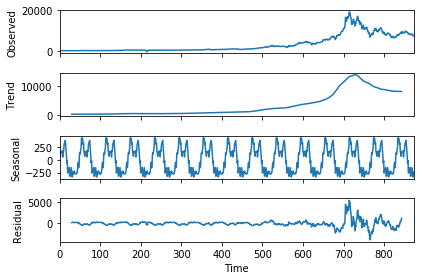

In [18]:
#decomposation with additive model
#We chose `additive`, so add Trend+Seasonal+Residual =`Observed`
s = sm.tsa.seasonal_decompose(working_data2.btc_price.values, freq=60, model = "additive")
splot = s.plot()

In [19]:
Test_Dates = Daily_Price_btc.index

trace1 = go.Scatter(x=Test_Dates, y=Daily_Price_btc.values, name= 'Bitcoin Price Index',
                   line = dict(color = ('rgb(66, 134, 244)'),width = 2))
data = [trace1]
layout = dict(title = 'Bitcoin Price Index Time Series',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results')

In [20]:
#seasonal decomposition using moving average, 60 days frequancy so far
s = sm.tsa.seasonal_decompose(working_data2.btc_price.values, freq=60)


#np.arange: Return evenly spaced values within a given interval.
trace1 = go.Scatter(x = np.arange(0, len(s.trend), 1),y = s.trend,mode = 'lines',name = 'Trend',
    line = dict(color = ('rgb(183, 69, 73)'), width = 3))
trace2 = go.Scatter(x = np.arange(0, len(s.seasonal), 1),y = s.seasonal,mode = 'lines',name = 'Seasonal',
    line = dict(color = ('rgb(244, 122, 244)'), width = 2))

trace3 = go.Scatter(x = np.arange(0, len(s.resid), 1),y = s.resid,mode = 'lines',name = 'Residual',
    line = dict(color = ('rgb(89, 177, 104)'), width = 2))

trace4 = go.Scatter(x = np.arange(0, len(s.observed), 1),y = s.observed,mode = 'lines',name = 'Observed',
    line = dict(color = ('rgb(66, 134, 244)'), width = 2))

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Seasonal decomposition', xaxis = dict(title = 'Time'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='seasonal_decomposition')

ACF and PACF

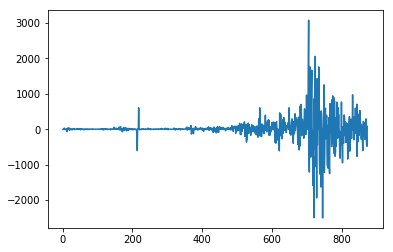

In [21]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
series = pd.DataFrame(working_data2.btc_price.values)
diff = series.diff()
pyplot.plot(diff)
pyplot.show()

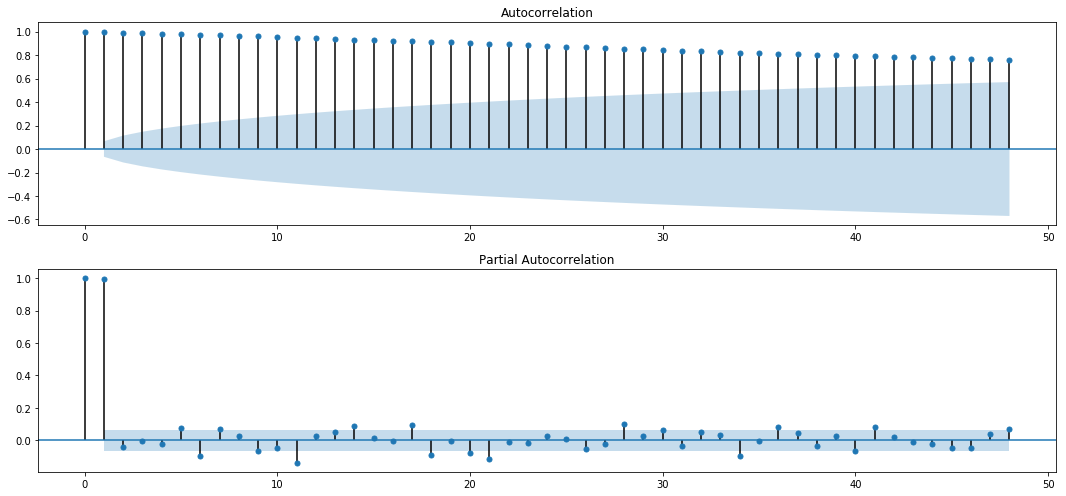

In [22]:
#checking with prof.Rojas on the spikes!!
value = working_data2.btc_price.values
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(value.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(value.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [23]:
#recover our df_train and df_test datasets:
df_train2 = working_data2[:-113]
df_test2 = working_data2[-113:]
#df_train.head()

# Data preparation

We need to prepare our dataset according to the requirements of the model, as well as to split the dataset into train and test parts. 

In the next cell, we define a function which creates X inputs and Y labels for our model. In the sequential forecasting, we predict the future value based on some previous and current values. So, our Y label is the value from the next (future) point of time while the X inputs are one or several values from the past. 

The amount of these values we can set by tuning the parameter look_back in our function. If we set it to 1, this means that we predict current value t based on the previous value (t-1).

In [24]:
def create_lookback(dataset1, dataset2, look_back= 20):
    X, Y = [], []
    for i in range(len(dataset1)-look_back):
        a = dataset1[i :(i + look_back), 0]
        X.append(a)
        Y.append(dataset2[i+look_back, 0])
    return np.array(X), np.array(Y)

In [25]:
from sklearn.preprocessing import MinMaxScaler
#both btc and vix
training_set1 = df_train.values
training_set1 = np.reshape(training_set1, (len(training_set1), 3))
test_set1 = df_test.values
test_set1 = np.reshape(test_set1, (len(test_set1), 3))

#just btc for y_train and y_test
training_set2 = df_train_btc.values
training_set2 = np.reshape(training_set2, (len(training_set2), 1))
test_set2 = df_test_btc.values
test_set2 = np.reshape(test_set2, (len(test_set2), 1))

#scale datasets
#normalize the dataset with MinMaxScaler:
scaler = MinMaxScaler()
training_set1 = scaler.fit_transform(training_set1)
test_set1 = scaler.transform(test_set1)

training_set2 = scaler.fit_transform(training_set2)
test_set2 = scaler.transform(test_set2)

#create datasets which are suitable for time series forecasting
look_back = 20
X_train, Y_train = create_lookback(training_set1, training_set2, look_back)
X_test, Y_test = create_lookback(test_set1, test_set2, look_back)

print(np.shape(X_train))

#reshape datasets so that they meet the requirements of the LSTM model in Keras
#Three inputs: samples num = len(X_train), time steps = X_train.shape[1], features = 1
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

(741, 20)


In [26]:
#print(Y_train)
#print()
#print(np.shape(Y_train))

# Single Layer LSTM Neural Network

In [27]:
# initialize sequential model, add 2 stacked LSTM layers and densely connected output neuron
K.clear_session()
model = Sequential()
model.add(LSTM(5, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# compile and fit the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test),
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)])

Train on 741 samples, validate on 93 samples
Epoch 1/100
741/741 [==============================] - 2s 2ms/step - loss: 0.0184 - val_loss: 0.0310
Epoch 2/100
741/741 [==============================] - 1s 1ms/step - loss: 0.0201 - val_loss: 0.0243
Epoch 3/100
741/741 [==============================] - 1s 1ms/step - loss: 0.0138 - val_loss: 0.0141
Epoch 4/100
741/741 [==============================] - 1s 1ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 5/100
741/741 [==============================] - 1s 1ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 6/100
741/741 [==============================] - 1s 1ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 7/100
741/741 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 0.0057
Epoch 8/100
741/741 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 0.0079
Epoch 9/100
741/741 [==============================] - 1s 1ms/step - loss: 0.0015 - val_loss: 0.0091
Epoch 10/100
741/741 [========================

In [28]:
trace1 = go.Scatter(
    x = np.arange(0, len(history.history['loss']), 1),
    y = history.history['loss'],
    mode = 'lines',
    name = 'Train loss',
    line = dict(color=('rgb(66, 244, 155)'), width=2, dash='dash')
)
trace2 = go.Scatter(
    x = np.arange(0, len(history.history['val_loss']), 1),
    y = history.history['val_loss'],
    mode = 'lines',
    name = 'Test loss',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)

data = [trace1, trace2]
layout = dict(title = 'Train and Test Loss during training',
              xaxis = dict(title = 'Epoch number'), yaxis = dict(title = 'Loss'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='training_process')

In [29]:
# concatenate train and test data to make analysis and transformations simultaneously
working_data1 = [df_train, df_test]
working_data1 = pd.concat(working_data1)

working_data1 = working_data1.reset_index()
working_data1['date'] = pd.to_datetime(working_data1['date'])
working_data1 = working_data1.set_index('date')

#working data for just bitcoin prices
working_data2 = [df_train_btc, df_test_btc]
working_data2 = pd.concat(working_data2)

working_data2 = working_data2.reset_index()
working_data2['date'] = pd.to_datetime(working_data2['date'])
working_data2 = working_data2.set_index('date')

In [30]:
#recover our df_train and df_test datasets:
df_train = working_data1[:-113]
df_test = working_data1[-113:]
print(df_train.head())

df_train_btc = working_data2[:-113]
df_test_btc = working_data2[-113:]
print(df_train_btc.head())

            btc_price  vix_price  em_price
date                                      
2016-01-02     432.70      18.21   2103.62
2016-01-03     428.66      18.21   2103.62
2016-01-04     432.90      20.70   2173.40
2016-01-05     431.84      19.34   2171.41
2016-01-06     427.99      20.59   2195.84
            btc_price
date                 
2016-01-02     432.70
2016-01-03     428.66
2016-01-04     432.90
2016-01-05     431.84
2016-01-06     427.99


In [31]:
# add one additional data point to align shapes of the predictions and true labels
#X_test = np.append(X_test, scaler.transform(working_data1.iloc[-1][0]))
#X_test = np.reshape(X_test, (len(X_test), 1, 1))
#print(len(X_test))

#get predictions and then make some transformations to be able to calculate RMSE properly in USD
prediction = model.predict(X_test)
prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

prediction2_inverse = np.array(prediction_inverse[:,0])
Y_test2_inverse = np.array(Y_test_inverse[:,0])

print(prediction2_inverse)
print(len(prediction2_inverse))
print(len(Y_test2_inverse))

[ 11348.24414062  11452.41308594  11442.51757812  11450.3984375
  11406.09863281  11342.99414062  11375.02246094  11449.72558594
  11487.37207031  11582.97851562  11688.86523438  11827.9453125
  11958.54296875  12059.55371094  12063.5         11955.8984375
  11770.79492188  11582.21679688  11363.49707031  11256.37988281
  11133.63769531  11023.52441406  10807.45507812  10604.55859375
  10430.37890625  10224.97363281  10085.75488281  10031.12109375
  10039.44921875  10054.10058594  10040.94042969  10054.734375
  10019.10253906   9969.09375      9879.57421875   9748.68457031
   9652.23242188   9444.734375     9207.04199219   9003.42773438
   8811.15332031   8681.50683594   8636.09179688   8503.30566406
   8373.32421875   8236.03222656   8160.97265625   8123.30810547
   8050.47998047   7997.48779297   7973.44970703   8120.77880859
   8265.35351562   8412.48730469   8602.05957031   8726.18066406
   8800.30957031   8907.33984375   9021.75585938   9214.12890625
   9398.64257812   9537.814453

In [32]:
trace1 = go.Scatter(
    x = np.arange(0, len(prediction2_inverse), 1),
    y = prediction2_inverse,
    mode = 'lines',
    name = 'Predicted labels',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)
trace2 = go.Scatter(
    x = np.arange(0, len(Y_test2_inverse), 1),
    y = Y_test2_inverse,
    mode = 'lines',
    name = 'True labels',
    line = dict(color=('rgb(66, 134, 244)'), width=2)
)

data = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted',
             xaxis = dict(title = 'Day number'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating0')

In [33]:
RMSE = sqrt(mean_squared_error(Y_test2_inverse, prediction2_inverse))
print('Test RMSE: %.3f' % RMSE)

Test RMSE: 1569.686


In [34]:
Test_Dates = Daily_Price[len(Daily_Price)-days_from_train:].index

trace1 = go.Scatter(x=Test_Dates, y=Y_test2_inverse, name= 'Actual Price',
                   line = dict(color = ('rgb(66, 134, 244)'),width = 2))
trace2 = go.Scatter(x=Test_Dates, y=prediction2_inverse, name= 'Predicted Price',
                   line = dict(color = ('rgb(244, 146, 65)'),width = 2))
data = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted, by dates',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating1')

In [35]:
# This function prepares random train/test split, scales data with MinMaxScaler, create time series labels (Y)
def get_split(working_data1, working_data2, n_train, n_test, look_back = 28):
    # get a point from which we start to take train dataset and after it is test dataset, ask Mojtaba here?
    start_point = randint(0, (len(working_data1)-n_test-n_train))
    df_train = working_data1[start_point:start_point+n_train]
    df_test = working_data1[start_point+n_train:start_point+n_train+n_test]

    training_set1 = df_train.values
    training_set1 = np.reshape(training_set1, (len(training_set1), 3))
    test_set1 = df_test.values
    test_set1 = np.reshape(test_set1, (len(test_set1), 3))
    
    #repeat above again for just btc price
    df_train_btc = working_data2[start_point:start_point + n_train]
    df_test_btc = working_data2[start_point + n_train:start_point + n_train + n_test]

    training_set2 = df_train_btc.values
    training_set2 = np.reshape(training_set2, (len(training_set2), 1))
    test_set2 = df_test_btc.values
    test_set2 = np.reshape(test_set2, (len(test_set2), 1))
    
    # scale datasets
    scaler_cv = MinMaxScaler()
    training_set1 = scaler_cv.fit_transform(training_set1)
    test_set1 = scaler_cv.transform(test_set1)
    
    # repeat the scale datasets for just bitcoin data
    scaler_cv = MinMaxScaler()
    training_set2 = scaler_cv.fit_transform(training_set2)
    test_set2 = scaler_cv.transform(test_set2)

    look_back = 28
    # create datasets which are suitable for time series forecasting
    X_train, Y_train = create_lookback(training_set1, training_set2, look_back)
    X_test, Y_test = create_lookback(test_set1, test_set2, look_back)

    # reshape datasets so that they will be ok for the requirements of the models in Keras
    X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
    X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

    return X_train, Y_train, X_test, Y_test, scaler_cv, start_point

In [36]:
# This function takes datasets from the previous function as input and train model using these datasets
def train_model(X_train, Y_train, X_test, Y_test):
    # initialize sequential model, add bidirectional LSTM layer and densely connected output neuron
    model = Sequential()
    model.add(GRU(256, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))

    # compile and fit the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs = 100, batch_size = 16, shuffle = False,
                    validation_data=(X_test, Y_test), verbose=0,
                    callbacks = [EarlyStopping(monitor='val_loss',min_delta=5e-5,patience=20,verbose=0)])
    return model

# This function uses trained model and test dataset to calculate RMSE, double check the inputs pls
def get_rmse(model, X_test, Y_test, scaler, start_point, working_data, n_train):
    # add one additional data point to align shapes of the predictions and true labels
    #X_test = np.append(X_test, scaler.transform(working_data1.iloc[start_point+n_train+len(X_test)][0]))
    #X_test = np.reshape(X_test, (len(X_test), 1, 1))

    # get predictions and then make some transformations to be able to calculate RMSE properly in USD
    prediction = model.predict(X_test)
    prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
    Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))
    
    prediction2_inverse = np.array(prediction_inverse[:,0])
    Y_test2_inverse = np.array(Y_test_inverse[:,0])

    #calculate RMSE
    RMSE = sqrt(mean_squared_error(Y_test2_inverse, prediction2_inverse))
    return RMSE, prediction2_inverse

In [37]:
#uses all three previous functions to build workflow of calculations and return RMSE and predictions of the model
def workflow(working_data, get_split, train_model, get_rmse,n_train = 250,n_test = 50,look_back = 28):
    X_train, Y_train, X_test, Y_test, scaler, start_point = get_split(working_data1, working_data2, n_train, n_test)
    model = train_model(X_train, Y_train, X_test, Y_test)
    RMSE, predictions = get_rmse(model, X_test, Y_test, scaler, start_point, working_data, n_train)
    return RMSE, predictions

In [38]:
RMSE, predictions = workflow(working_data1, get_split, train_model, get_rmse, n_train = 761, n_test = 113)
print('Test GRU model RMSE: %.3f' % RMSE)

Test GRU model RMSE: 557.161


In [39]:
# This function is used to repeat the workflow ten times and to calculate average RMSE
def cross_validate(working_data,get_split,train_model,get_rmse,workflow,n_train = 761,n_test = 113,look_back = 28):
    rmse_list = []
    for i in range(10):
        print('Iteration:', i+1)
        RMSE, _ = workflow(working_data, get_split, train_model, get_rmse, n_train, n_test, look_back)
        rmse_list.append(RMSE)
        print('Test RMSE: %.3f' % RMSE)
    mean_rmse = np.mean(rmse_list)
    return mean_rmse, rmse_list

In [40]:
mean_rmse, rmse_list = cross_validate(working_data1, get_split, train_model, get_rmse, workflow)
print('Average RMSE: ', mean_rmse)
print('RMSE list:', rmse_list)

Iteration: 1
Test RMSE: 609.129
Iteration: 2
Test RMSE: 572.053
Iteration: 3
Test RMSE: 527.194
Iteration: 4
Test RMSE: 573.446
Iteration: 5
Test RMSE: 508.808
Iteration: 6
Test RMSE: 562.531
Iteration: 7
Test RMSE: 557.354
Iteration: 8
Test RMSE: 549.857
Iteration: 9
Test RMSE: 685.640
Iteration: 10
Test RMSE: 587.338
Average RMSE:  573.335079769
RMSE list: [609.1291656013154, 572.0534848927009, 527.1937675434807, 573.4462879227793, 508.80810592620384, 562.5306256916251, 557.3542007020513, 549.8567965798707, 685.6402093388182, 587.3381534939549]


In [41]:
predictions_new = predictions - mean_rmse
#print(len(predictions_new))
#print(len(Y_test2_inverse))
RMSE_new = sqrt(mean_squared_error(Y_test2_inverse, predictions_new))
print('Test GRU model RMSE_new: %.3f' % RMSE_new)

ValueError: Found input variables with inconsistent numbers of samples: [93, 85]

In [ ]:
trace1 = go.Scatter(x=Test_Dates, y=Y_test2_inverse, name= 'Actual Price',
                   line = dict(color = ('rgb(66, 134, 244)'),width = 2))
trace2 = go.Scatter(x=Test_Dates, y=predictions_new, name= 'Predicted Price',
                   line = dict(color = ('rgb(244, 146, 65)'),width = 2))
data = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted, by dates',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating2')

Let’s calculate a symmetric mean absolute percentage error ( SMAPE). It will show how good our predictions are in percentage. We define function symmetric_mean_absolute_percentage_error, which will perform all necessary calculations.

In [ ]:
def symmetric_mean_absolute_percentage_error(y_true, y_pred, epsilon = 1e-8):
    return np.mean(np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred))/2 + epsilon)) * 100

SMAPE = symmetric_mean_absolute_percentage_error(Y_test2_inverse, predictions_new)

print('Test SMAPE (percentage): %.3f' % SMAPE)

# Random Walk

In [ ]:
a = [1,2,3,4,5]
a[:-1]

In [ ]:
y_test = pd.DataFrame(Y_test2_inverse)
y_pred = pd.DataFrame(predictions_new)

data_rw= pd.concat([y_test, y_pred], axis=1)
data_rw.to_csv('random walk.csv', sep='\t', encoding='utf-8')

In [ ]:
len(predictions_new)